# Анализ маркетинговой кампании развлекательного приложения

## Описание проекта

Задача маркетингового аналитика из команды развлекательного приложения Procrastinate Pro+.

Несколько прошлых месяцев бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Нужно разобраться в причинах этой ситуации и помочь маркетологам.

В распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов.

Необходимо изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# подготовка функции для вывода общей информации о датасете
def data_main_info(data):
    
    # вывод шапки и общей информации
    print('Шапка и общая информация о данных')
    display(data.head(10))
    print(data.info())
    print()
    
    # вывод статистической информации о датасете
    print('Статистическая информация о данных')
    display(data.describe())
    print()
    
    # подсчет и вывод количества явных дубликатов в данных
    print('Количество явных дубликатов в данных:', data.duplicated().sum())
    print()
    
    # подсчет и вывод количества пропусков по столбцам
    print('Количество пропусков в данных')
    display(data.isna().sum().sort_values(ascending=False))

## Изучение данных

Загрузим данные о посещениях, заказах и расходах на рекламу. Посмотрим на каждый датасет по отдельности.

### Данные по визитам на сайте

In [3]:
# чтение данных по визитам на сайт
visits = pd.read_csv('/Users/danilvlasenko/Desktop/projects_datasets/visits_info_short.csv')

# информация о визитах
data_main_info(visits)

Шапка и общая информация о данных


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None

Статистическая информация о данных


,User Id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11



Количество явных дубликатов в данных: 0

Количество пропусков в данных


User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

В таблице visits_log_short (лог сервера с информацией о посещениях сайта) представлены следующие столбцы:
- `User Id` — уникальный идентификатор пользователя
- `Region` - страна пользователя
- `Device` — категория устройства пользователя
- `Channel` — идентификатор рекламного источника, из которого пришел пользователь
- `Session start` — дата и время начала сессии
- `Session End` — дата и время окончания сессии

По типам данных в `visits`:
- `User Id` — тип данных корректный
- `Region` — тип данных корректный
- `Device` — тип данных корректный
- `Channel` — тип данных корректный
- `Session start` — необходим тип данных *datetime*
- `Session End` — необходим тип данных *datetime*

### Данные по совершенным заказам

In [4]:
# чтение данных по заказам
orders = pd.read_csv('/Users/danilvlasenko/Desktop/projects_datasets/orders_info_short.csv')

# информация о заказах
data_main_info(orders)

Шапка и общая информация о данных


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None

Статистическая информация о данных


,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000



Количество явных дубликатов в данных: 0

Количество пропусков в данных


User Id     0
Event Dt    0
Revenue     0
dtype: int64

В таблице orders_log_short (информация о заказах) представлены следующие столбцы:
- `User Id` — уникальный id пользователя, который сделал заказ
- `Event Dt` — дата и время покупки
- `Revenue` — выручка

По типам данных в `orders`:
- `User Id` — тип данных корректный
- `Event Dt` — необхожим тип данных *datetime*
- `Revenue` — типа данных корректный

### Данные по затратам на рекламу

In [5]:
# чтение данных по расходам
costs = pd.read_csv('/Users/danilvlasenko/Desktop/projects_datasets/costs_info_short.csv')

# информация о расходах
data_main_info(costs)

Шапка и общая информация о данных


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None

Статистическая информация о данных


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000



Количество явных дубликатов в данных: 0

Количество пропусков в данных


dt         0
Channel    0
costs      0
dtype: int64

В таблице costs_short (информация о затратах на маркетинг) представлены следующие столбцы:
- `Channel` — идентификатор рекламного источника
- `Dt` — дата
- `Costs` — затраты на этот рекламный источник в этот день

По типам данных в `costs`:
- `Dt` — необходим тип данных *datetime*
- `Channel` — тип данных корректный
- `Costs` — тип данных корректный

**Первичные выводы по имеющимся данным**

- 1) Пропуски во всех 3-х датасетах отсутствуют
- 2) Явные дубликаты во всех 3-х датасетах отсутствуют
- 3) Во всех 3-х датасетах не совсем корректный регистр в названиях столбцов - стоит изменить его на нижний
- 4) Во всех 3-х датасетах типы данных в столбцах с датами/временем выставлены *object* - необходимо присвоение типа *datetime*

## Предобработка данных

Проверим каждый датасет по выводам 3-4 и перезапишем в те же переменные.

### Проверка датасета visits

In [6]:
# изменение регистра в названиях столбцов датасета visits
visits = visits.rename(columns = {'User Id':'user_id',
                                'Region':'region',
                                'Device':'device',
                                'Channel':'channel',
                                'Session Start':'session_start',
                                'Session End':'session_end'
                                 }
                      )

# изменение типов данных на datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

# проверка изменений
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Проверим также уникальные значения столбцов `region`, `device` и `channel`, на предмет наличия неявных дубликатов - случайно могут оказаться и такие

In [7]:
# столбец region
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [8]:
# столбец device
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [9]:
# столбец channel
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

Регистры изменены, типы данных скорректированы

Используем в дальнейшем датасет `visits`

Судя по уникальным значениям в логах, имеем статистику по США, Великобритании, Франции и Германии с устройств Apple (Mac и iPhone), Android и ПК, по 10 каналам привлечения.

### Проверка датасета orders

In [10]:
# изменение регистра в названиях столбцов датасета orders
orders = orders.rename(columns = {'User Id':'user_id',
                                  'Event Dt':'event_dt',
                                  'Revenue':'revenue'
                                 }
                      )

# изменение типов данных на datetime
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

# проверка изменений
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Регистры изменены, типы данных скорректированы

Используем в дальнейшем датасет `orders`

### Проверка датасета costs

In [11]:
# изменение регистра в названиях столбцов датасета costs
costs = costs.rename(columns = {'Dt':'dt',
                                'Channel':'channel',
                                'Costs':'costs'
                               }
                    )

# вывод даты
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

# проверка изменений
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Проверим также уникальные значения в столбце `channel` - в идеале они должны совпадать со значения такого же столбца в датасете `visits`, но за исключением органики (должно отсутствовать значение `'organic'`)

In [12]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Так и есть, по всем каналам привлечения производились затраты на маркетинг

Регистры изменены, типы данных скорректированы

Используем в дальнейшем датасет `costs`

**Выводы по предобработке**

Данные прочитаны, предобработаны и готовы к дальнейшему использованию и расчету метрик.
- Пропуски в данных отсутствуют
- Явные и неявные дубликаты отсутствуют
- Изменены названия столбцов на более корректные
- Изменены типы данных - выведены форматы даты и времени

В будущем для удобства восприятия, считаем все денежные единицы и затраты как доллары - судя по уникальным значениям столбца *region* в датасете `visits`, приложение международное, и обычно бюджеты считаются в долларах США.

## Создание функций для расчета и анализа LTV, ROI, удержания и конверсии

Для составления профилей пользователей, расчетов LTV, ROI, удержания и конверсии используем функции: `get_profiles`, `get_retention`, `get_conversion` и `get_ltv`.

### Функция для создания профилей пользователей

In [13]:
# функция для создания профилей пользователей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.month

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция для расчета удержания пользователей

In [14]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчета конверсии пользователей

In [15]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчета LTV и ROI

In [16]:
# функция для расчета LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Для визуализации используем функции `filter_data`, `plot_retention`, `plot_conversion` и `plot_ltv_roi`.

### Функция для сглаживания графиков с помощью скользящего среднего

In [17]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функция для визуализации удержания

In [18]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 


### Функция для визуализации конверсии

In [19]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Функция для визуализации LTV и ROI

In [20]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Промежуточный вывод**

Функции `get_profiles`, `get_conversion`, `get_ltv` для расчета параметров, а также функции `filter_data`, `plot_retention`, `plot_conversion` и `plot_ltv_roi` для визуализации заданы.

Параметр *window* для сглаживания задан как 14, так как рассматриваются 2-х недельные периоды - по бизнес-плану окупаемость пользователя должна наступать не позже, чем через 2 недели

## Исследовательский анализ данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [21]:
# построение профилей пользователей с помощью функции get_profiles
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,7,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,10,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,8,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,10,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,5,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,8,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,6,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,5,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,5,False,0.250435


In [22]:
# проверка дат привлечения
print('Дата привлечения самого первого пользователя:', profiles['dt'].min())
print('Дата привлечения крайннего пользователя в анализируемом промежутке:', profiles['dt'].max())

Дата привлечения самого первого пользователя: 2019-05-01
Дата привлечения крайннего пользователя в анализируемом промежутке: 2019-10-27


Профили пользователей получены, максимальные и минимальные даты привлечения определены. Судя по общим максимальным датам привлечения, действительно имеем дело с базой за период с 01.05.2019 по 27.10.2019.

### Определение стран охвата рекламы

**Определим, из каких стран приходили пользователи и в каких платящих пользователей больше всего** 

Для этого построим таблицу с группировкой пользователей по регионам - выведем общее количество пользователей и отдельно долю плятящих

In [23]:
# объявление технической функции, для форматирования значения доли плятящих пользователей
def share_format(x):
    return '{:.1%}'.format(x)

# объявление функции для расчета и вывода доли платящих пользователей
def share_calculation(data):
    share_of_paying = data['users_payers'] / data['users_all']

    # добавление нового значения в таблицу
    data['true_payers'] = share_of_paying.apply(share_format)

    return display(data.sort_values(by='true_payers', ascending=False))

In [24]:
# получение сгруппированной таблицы с общим количеством пользователей в регионе и долей платящих
payer_by_region = (
    profiles.groupby('region')
    .agg({'user_id':'nunique', 'payer':'sum'})
    .rename(columns={'user_id':'users_all',
                     'payer':'users_payers'})
)

# расчет и вывод доли платящих пользователей по странам
share_calculation(payer_by_region)

,users_all,users_payers,true_payers
region,,,
United States,100002,6902,6.9%
Germany,14981,616,4.1%
UK,17575,700,4.0%
France,17450,663,3.8%


В приложение Procrastinate Pro+ приходят пользователи из 4-х стран - это США, Германия, Великобритания и Франция.
- Наибольшее количество пользователей и наибольшая конверсия наблюдается среди пользователей из США. При самом большом количестве пользователей, это вполне ожидаемо.
- Пользователи из Германии ковертируются в целом лучше, чем пользователи из Великобритании и Франции.
- Великобритания и Франция имеют примерно одинаковую базу пользователей, но в Великобритании "остается" больше польователей.

### Определение устройств охвата рекламы

**Определим, с каких устройств заходят пользователи и с каких чаще всего заходят платящие пользователи**

Для этого построим таблицу с группировкой по устройствам и отдельным выводом доли платящих на каждом устройстве

In [25]:
# получение сгруппированной таблицы с общим количеством пользователей
# с определенными устройствами и долей платящих
payer_by_device = (
    profiles.groupby('device')
    .agg({'user_id':'nunique', 'payer':'sum'})
    .rename(columns={'user_id':'users_all',
                     'payer':'users_payers'})
)

# расчет и вывод доли платящих пользователей по устройствам
share_calculation(payer_by_device)

,users_all,users_payers,true_payers
device,,,
Mac,30042,1912,6.4%
iPhone,54479,3382,6.2%
Android,35032,2050,5.9%
PC,30455,1537,5.0%


Наибольшая доля платящих пользователей приходится на устройства Apple - но в большей степени на компьютерах Mac (по обоим устройствам более 6%). Наименее платящими являются пользователи на ПК с Windows.

### Определение каналов привлечения пользователей

**Определим, по каким рекламным каналам шло привлечение пользователей и с каких приходят наиболее платежеспособные**

Для этого построим таблицу с группировкой по каналам привлечения и отдельным выводом доли плятщих с каждого канала

In [26]:
# получение сгруппированной таблицы с общим количеством пользователей
# c каждого канала привлечения и долей платящих по каждому каналу
payer_by_channel = (
    profiles.groupby('channel')
    .agg({'user_id':'nunique', 'payer':'sum'})
    .rename(columns={'user_id':'users_all',
                     'payer':'users_payers'})
)

# расчет и вывод доли платящих пользователей по каналам привлечения
share_calculation(payer_by_channel)

,users_all,users_payers,true_payers
channel,,,
TipTop,19561,1878,9.6%
RocketSuperAds,4448,352,7.9%
WahooNetBanner,8553,453,5.3%
YRabbit,4312,165,3.8%
MediaTornado,4364,156,3.6%
LeapBob,8553,262,3.1%
OppleCreativeMedia,8605,233,2.7%
organic,56439,1160,2.1%
FaceBoom,29144,3557,12.2%


Пользователи в целом приходят с 10 каналов созданной рекламы. Больше всего пользователей на платной основе приходит из источников FaceBoom, AdNonSense, lambdaMediaAds, TipTop и RocketSuperAds (5 источников). Из 5 источников конверсия на порядок меньше - предположу, что если затраты на рекламу по источникам сопоставимы, то в оставшихся 5 реклама неэффективна.

Пользователи, пришедшие самостоятельно, почти не используют приложение на платной основе.

**Вывод по исследовательскому анализу**

- 2/3 всех пользователей приложения - из США. Остальная 1/3 находится в Европе, и конверсия у них существенно меньше.
- Самыми платежеспособными пользователями являются владельцы техники Apple (в совокупности).
- Наиболее эффективными каналами привлечения являются 5 источников, из остальных 5 пользователи гораздо реже переходят на платную основу. Органические пользователи почти не генерируют выручки.

## Маркетинг

Выясним:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [27]:
# общая сумма затрат на рекламу
sum_costs = costs['costs'].sum().round(2)
sum_costs

105497.3

### Анализ затрат на маркетинг

**Ответим на вопрос по затратам на маркетинг в различных разрезах**

Используем датасет `costs`. По каждому разрезу получим новые сгруппированные таблицы

Посмотрим на общее распределение рекламных затрат по каналам привлечения

In [28]:
# затраты по каждому источнику
channel_costs = costs.groupby('channel').sum()

# доля затрат на конкретный источник от общей суммы
channel_share = channel_costs['costs'] / sum_costs

# получение доли затрат по каждому каналу, из общего бюджета
channel_costs['share_persents'] = channel_share.apply(share_format)

# вывод сводной таблицы
display(channel_costs.sort_values(by='share_persents', ascending=False))

,costs,share_persents
channel,,
TipTop,54751.30,51.9%
WahooNetBanner,5151.00,4.9%
FaceBoom,32445.60,30.8%
AdNonSense,3911.25,3.7%
OppleCreativeMedia,2151.25,2.0%
LeapBob,1797.60,1.7%
RocketSuperAds,1833.00,1.7%
lambdaMediaAds,1557.60,1.5%
MediaTornado,954.48,0.9%


Для упрощения построения графиков выведем месяцы отдельным столбцом `month`, на основе даты из столбца `dt`

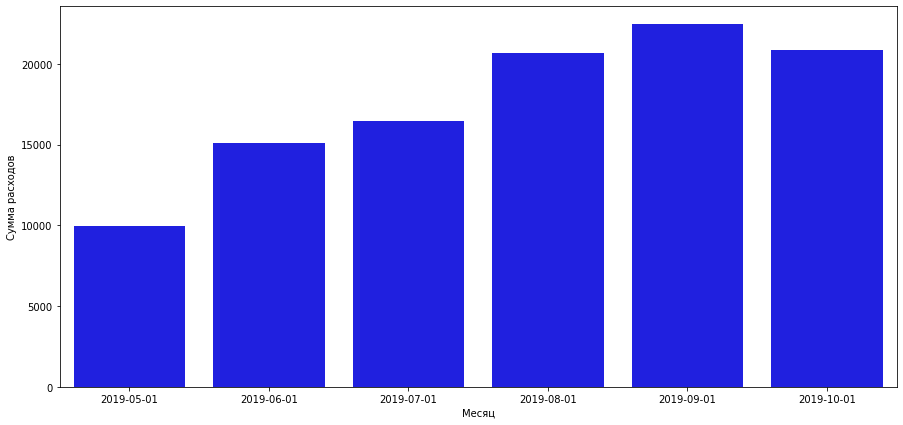

In [29]:
# изменение во времени
costs['month'] = costs['dt'].astype('datetime64[M]').dt.date

# получение данных для графика
data_to_plot = costs.groupby('month')['costs'].sum().reset_index()

# построение графика рекламных затрат по месяцам
plt.figure(figsize= (15, 7))
plot = sns.barplot(x = 'month',
                   y = 'costs',
                   data = data_to_plot,
                   color = 'blue'
                  )
plot.set_xlabel('Месяц')
plot.set_ylabel('Сумма расходов')
plt.show()

С момента начала (май 2019-го) рекламы расходы росли от месяца к месяцу до сентября, в октябре был небольшой спад.

Максимальные затраты на маркетинг наблюдаются в сентябре.

### Расчеты CAC

**Рассчитаем средний CAC по каждому каналу привлечения**

Рассчитаем средний CAC одной цифрой для каждого канала привлечения и выведем в виде таблицы

In [30]:
channel_cac_profiles = (profiles.groupby('channel')
                .agg({'user_id':'nunique',
                      'acquisition_cost':'mean'}
                    )
                .sort_values(by='user_id', ascending=False)
                .rename(columns={'user_id':'users_count',
                                 'acquisition_cost':'cac'}
                       )
               )
channel_cac_profiles['cac'] = channel_cac_profiles['cac'].round(2)
channel_cac_profiles

,users_count,cac
channel,,
organic,56439,0.00
FaceBoom,29144,1.11
TipTop,19561,2.80
OppleCreativeMedia,8605,0.25
LeapBob,8553,0.21
WahooNetBanner,8553,0.60
RocketSuperAds,4448,0.41
MediaTornado,4364,0.22
YRabbit,4312,0.22


Для визуализаии среднего CAC по каждому каналу используем датасет с профилями пользователей, получим из него сводную таблицу.

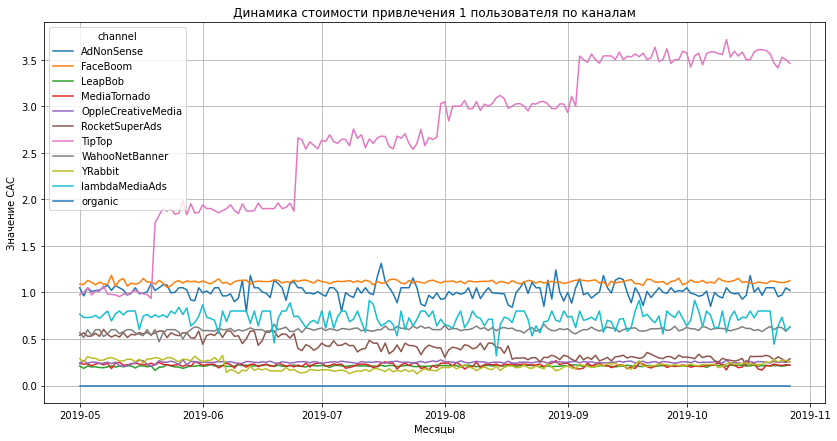

In [31]:
# построение графика изменения среднего cac по каждому каналу привлечения
plot = profiles.pivot_table(index = 'dt',
                     columns = 'channel',
                     values = 'acquisition_cost',
                     aggfunc = 'mean'
                    ).plot(grid = True, figsize = (14, 7))

plot.set_title('Динамика стоимости привлечения 1 пользователя по каналам')
plot.set_ylabel('Значение CAC')
plot.set_xlabel('Месяцы')
plt.show()

**Рассчитаем средний CAC для всего проекта**

Посчитаем общий средний CAC за всю рекламную кампанию. Для этого исключим из датасета с профилями пользователй тех, кто пришел самостоятельно (органических). Базой для расчета среднего берем столбец `'acquisition_cost'`

In [32]:
# исключаем пришедших самостоятельно
cac_profiles = profiles.query('channel != "organic"')

cac_all = cac_profiles['acquisition_cost'].mean().round(2)
cac_all

1.13

Все каналы привлечения стоят по-разному, в пределах от 0,3 до 1 доллара. В целом 9 из 10 источников остаются стабильными и чаще всего не превышают 1,2$ за клиента.

Очень сильно выделяется канал привлечения TipTop - практически каждый месяц стоимость рекламы увеличивается на 1 доллар, к концу рассматриваемого периода стоимость привлечения в 3,5 раза превышает изначальную. Стоит детальнее изучить именно этот источник - определить метод закупки рекламы, определить причины постоянного роста именно на 1 доллар. Это выглядит подозрительно.

**Выводы по анализу маркетинга**

- Всего на маркетинговую кампанию было потрачено 105,5 тыс. долларов
- Порядка 80% всего рекламного бюджета было потрачено на 2 каналах: TipTop и Facebook (аля TikTok и Facebook)
- С мая по сентябрь 2019-го месячные расходы на рекламу неуклонно росли, в октябре произошел небольшой спад. Пик наблюдается в сентябре
- Общий средний CAC за всю кампанию составляет 1,13 доллара за 1 нового пользователя
- Аномально высокий (на фоне остальных) средний CAC, и общий, и к концу проекта наблюдается у канала TipTop - стоит подробнее изучить именно этот канал привлечения пользователей. Также на этот канал приходится 50% всего рекламного бюджета

## Оценка окупаемости рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

Опишем более подробно проблемы в рекламной кампании. Ответим на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Считаем, что смотрим данные 1-го ноября 2019 года и в орагнизации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Анализ общей окупаемости рекламы

**Проведем общий анализ затрат на маркетинг**

Для этого используем функцию `get_ltv` в общем случае. Визуализируем информацию с помощью функции `plot_ltv_roi`. Зададим момент анализа - 01.11.2019 и горизонт анализа - 2 недели (14 дней)

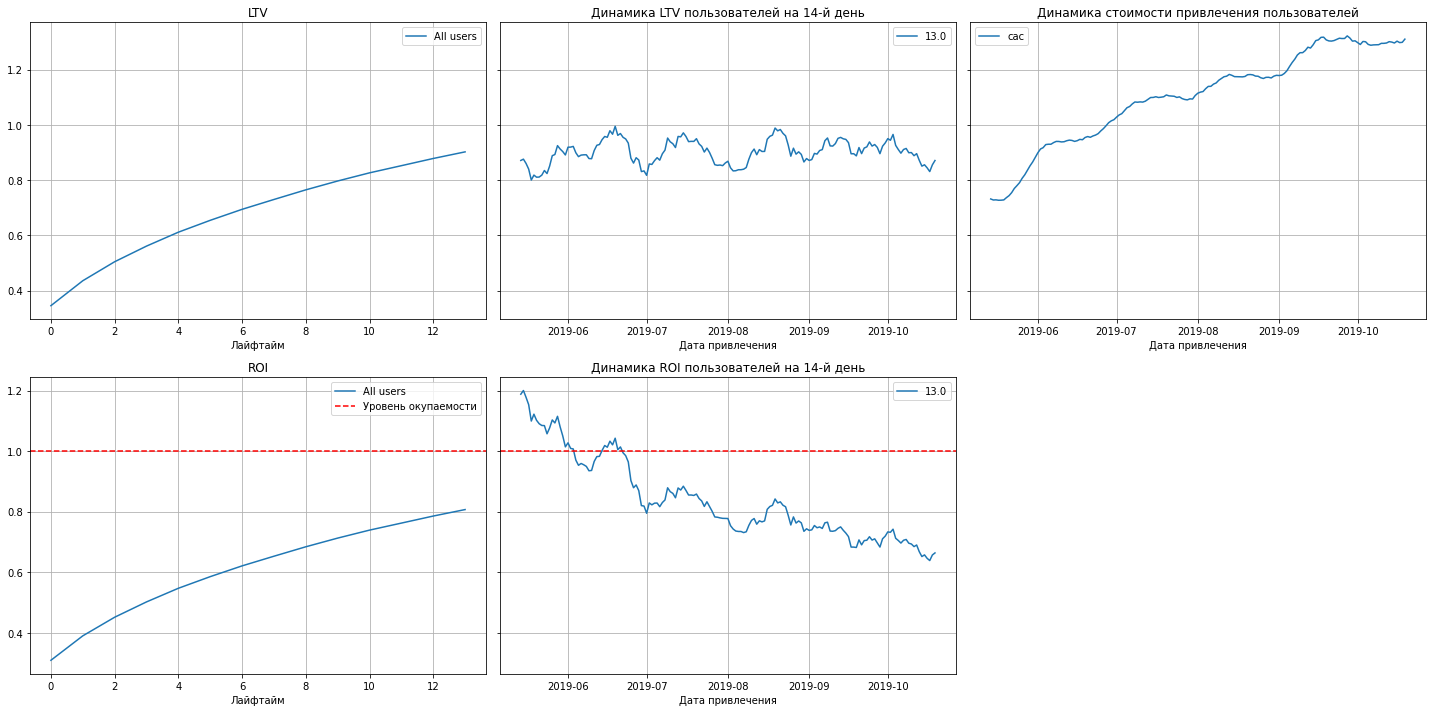

In [33]:
# введение момента и горизонта анализа
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

# расчет LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    cac_profiles, orders, observation_date, horizon_days
)

# построение графиков
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Выводы по общим графикам**

- Реклама в целом не окупается. Итоговый ROI на 1 ноября 2019-го чуть выше 80%;
- LTV в целом стабилен. Наблюдаеются периодические спады в моменты перехода между месяцами - скорее всего, подписка помесячная и дату оплаты можно выбрать самостоятельно. LTV вряд ли является причиной убытков;
- Стоимость привлечения клиентов начала резко расти практически сразу же с момента старта кампании, постоянно растет и не снижается. Обратная ситуация наблюдается с ROI - снижается с самого старта, затем тренд в целом на снижение вплоть до окончания кампании. Примерно в середине июня реклама перестала окупаться.

Основная проблема, возникшая в рекламной кампании, связана с резким ростом CAC - из-за этого снизился и общий ROI. Как было выявлено ранее на шаге 4, резкий рост CAC зафиксирован только в случае канала привлечения TipTop, причем скачки были равными - примерно по 0,5 доллара и каждый месяц. Также именно на этот канал определена половина всего бюджета - рекламному отделу было необходимо сразу же обратить внимание на резкий скачок и, возможно, изменить предпочтения по каналам.

### Анализ окупаемости по устройствам

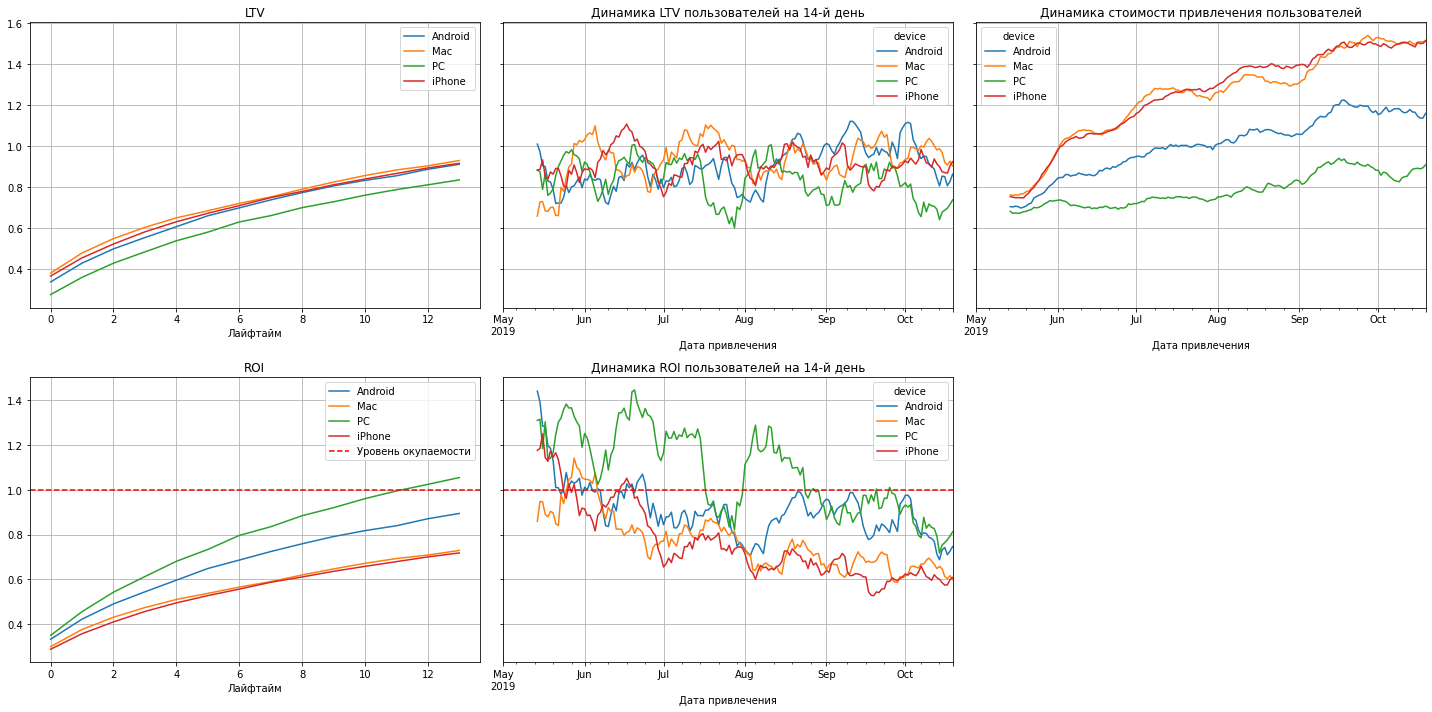

In [34]:
# задание параметра по устройствам
dimensions = ['device']

# получение данных
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    cac_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# визаулизация данных
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Судя по разрезу устройств, на каждом наблюдается рост CAC и паднение ROI с середины мая - это общий тренд.

По итогу, окупились только пользователи PC - пользователи смартфонов и компьютеров Mac не окупились.

По устройствам Apple рост был самый большой. *Запомним этот момент*

### Анализ окупаемости по странам привлечения

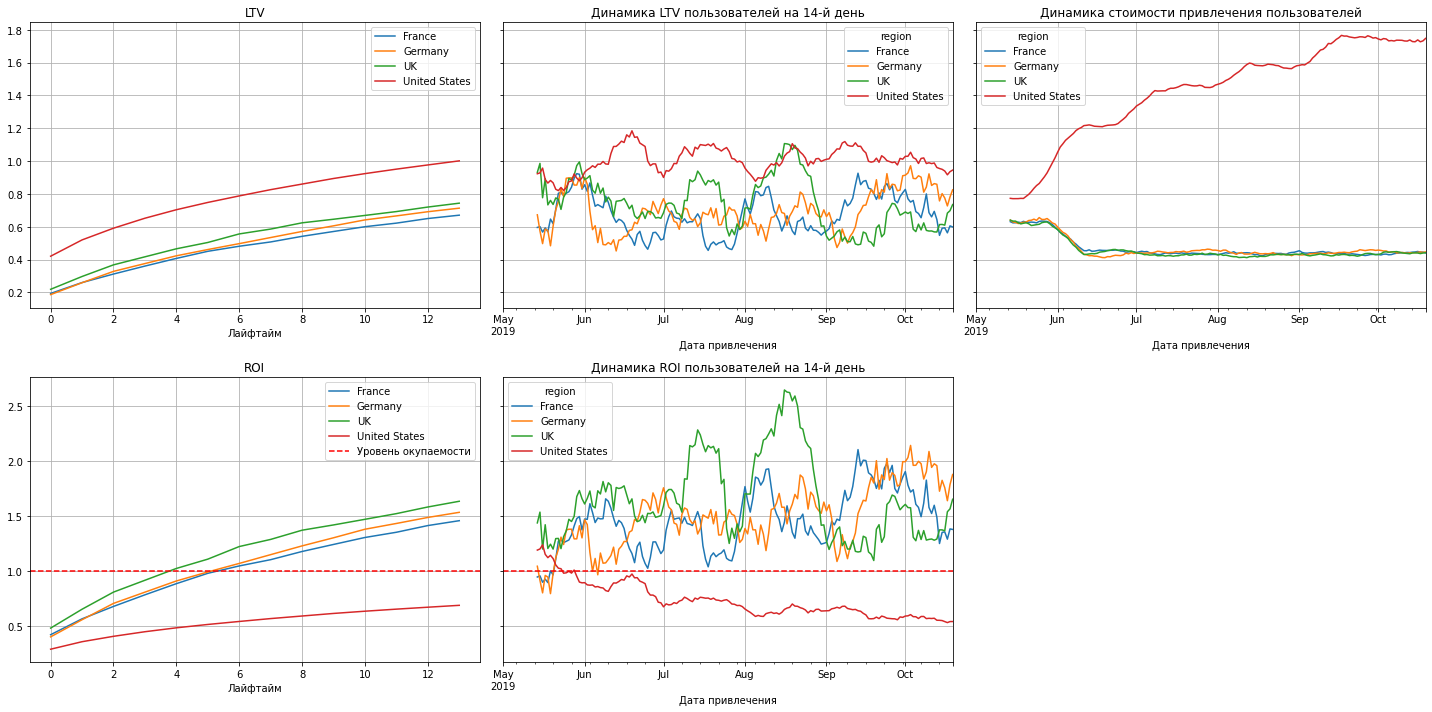

In [35]:
# задание параметра по странам
dimensions = ['region']

# получение данных
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    cac_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# визаулизация данных
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Судя по разрезу устройств, пользователи в Европе в среднем имеют схожий CAC, и у них не наблюдается падение ROI и они приносят хорошую прибыль. Более того, CAC даже снизился, затем сохранился всю кампанию и не повышался.

Серьезно выбиваются пользователи из США - именно в середине мая CAC резко вырос, что повлекло за собой неокупаемость и очень сильное падение ROI, без надежды на рост. Привлечение пользователей из США не окупается. *Запомним этот момент*

### Анализ окупаемости по каналам привлечения

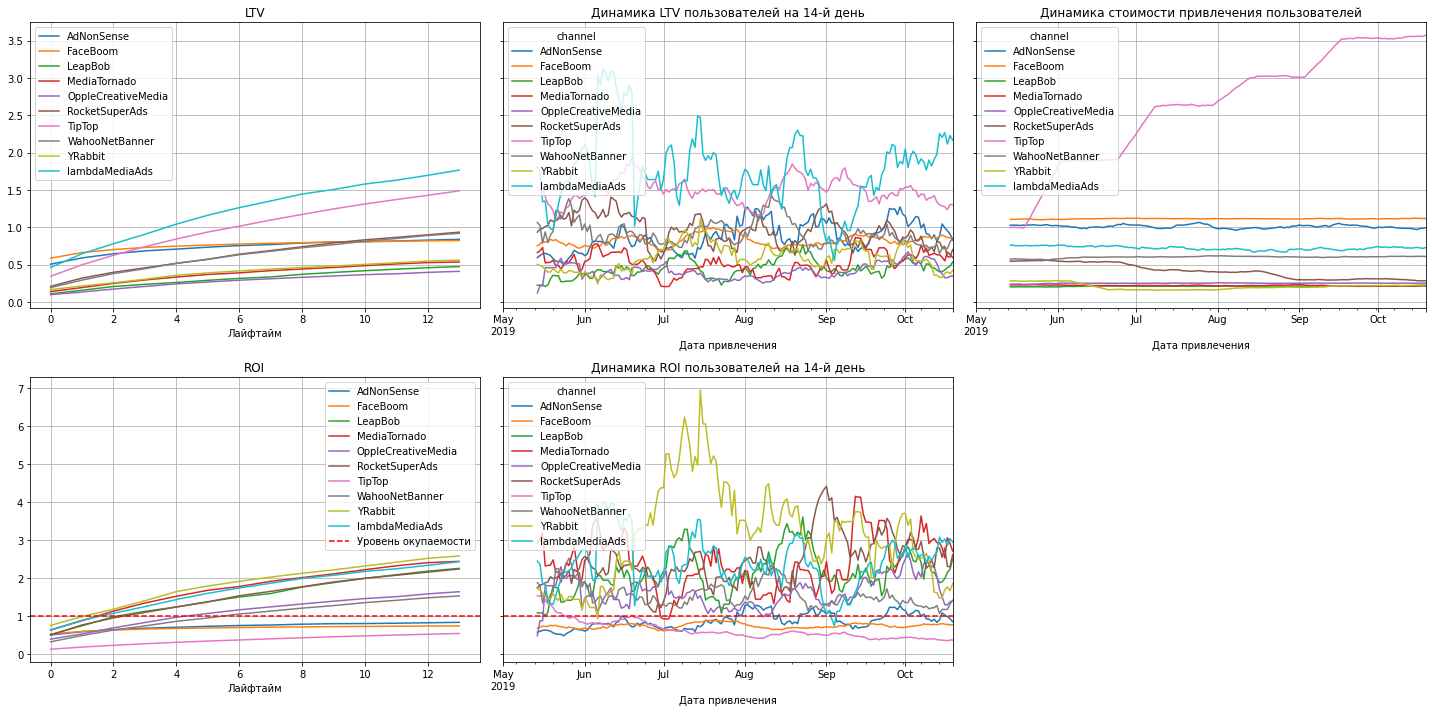

In [36]:
# задание параметра по рекламным каналам
dimensions = ['channel']

# получение данных
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    cac_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# визаулизация данных
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Судя по разрезу каналов привлечения, очень серьезно выбивается на общем фоне канал TipTop.
- Показатель LTV один из самых высоких и в целом стабилен
- Это единственный канал привлечения, по которому наблюдается рост CAC, и причем очень резкий в 3,5 раза. Соответственно, он точно не окупается (хотя в первые несколь недель в мае все же окупался)

Также замечаем, что в целом не окупаются еще 2 канала привлечения - это FaceBoom и AdNonSense. Дополнительно, судя по графику ROI, эти каналы не окупались изначально и являются в целом не эффективными.

Самыми эффективными каналами привлечения оказались LambdaMediaAds, YRabbit и MediaTornado.

*Итого, имеем 3 неэффективных канала привлечения - это TipTop, FaceBoom и AdNonSense. Стоит изучить их подробнее*

**Промежуточный вывод**

По итогу, CAC резко вырос у следующих категорий пользователей:
- Используют смартфона и/или компьютеры Mac
- Проживают в США
- Привлечены через TipTop, FaceBoom и AdNonSense. Последние 2 канала неэффективны изначально

В случае устройств - могут иметь место технические недочеты или неудобство приложений именно под интерфейсы мобильных устройств и macOS.

В случае региона - возможно, проблема возникла в каких-либо новых правилах оплаты или политических моментах, которые возникли неожиданно, а маркетологи на них не среагировали вовремя.

В случае канала привлечения - резкий рост наблюдается только у TipTop. Маркетологам следовало бы пересмотреть распределение бюджета по каналам и увеличить инвестиции в более стабильные каналы.

Дополнительно выделено еще 2 в целом неэффективных канала привлечения - это FaceBoom и AdNonSense. При неизменном CAC они в итоге не окупились - возможно, проблема связана с техническими ошибками при переходе лендинг приложения (или еще хуже - некорректная гиперссылка)

*Оффтоп:* В реальном мире, у TikTok (а именно материнской компании ByteDance) как раз в 2019-ом начались проблемы с властями США и всевозможные проверки. По итогу, в 2020-ом это чуть не вылилось в покупку компании со стороны Microsoft или полную блокировку приложения в США. Я бы на месте маркетологов вообще исключил TikTok из каналов привлечения.

## Изучение конверсий и удержания

**Оценим конверсию и удержание пользователей по устройствам, странам и каналам привлечения**

Для получения данных по конверсиям и удержанию используем функции `get_conversion` и `get_retention`, для визуализации используем функции `plot_conversion` и `plot_retention`.

Исходя из выводов на предыдущем шаге, изучим конверсии, и при необходимости, удержание, в разрезах устройств, стран и каналов привлечения.

### Изучение конверсии и удержания в разрезе устройств

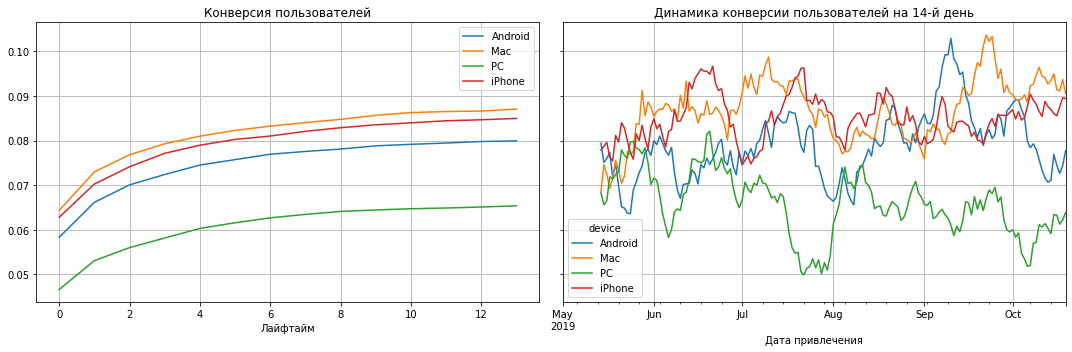

In [37]:
# получение данных по конверсиям в разрезе устройств
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    cac_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# визуализация конверсий в разрезе устройств
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Пользователи смартфонов и Mac конвертируются лучше всего. Посмотрим детальнее на удержание

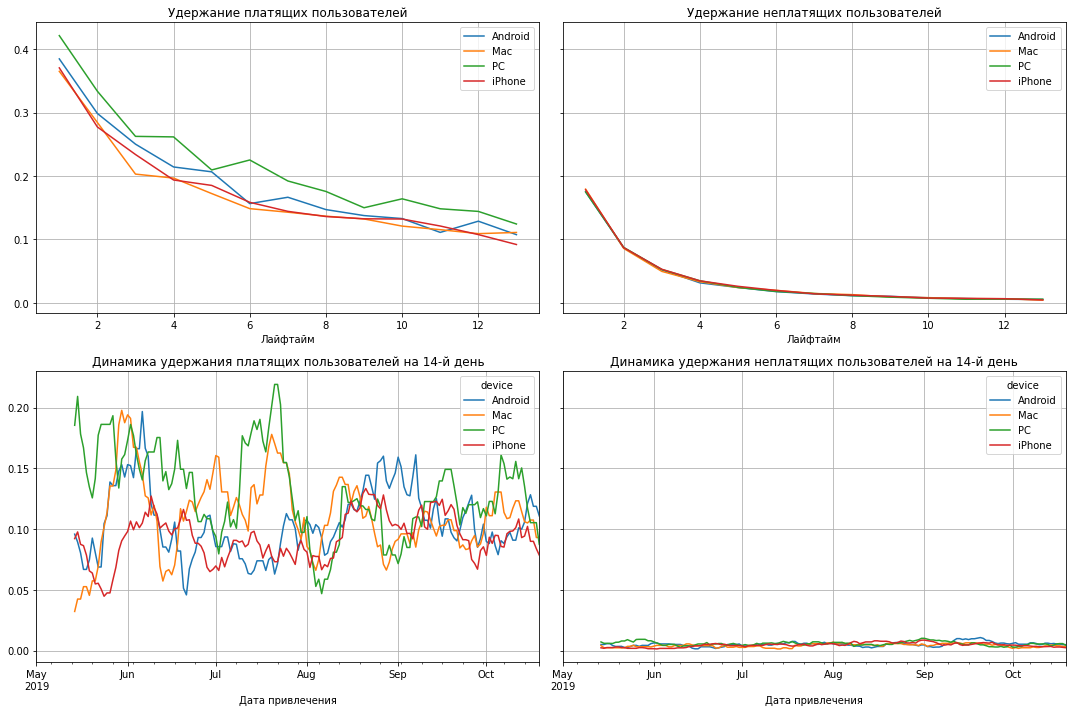

In [38]:
# получение данных по удержанию в разрезе устройств
retention_raw, retention_grouped, retention_history = get_retention(
    cac_profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

# визуализаця удержания в разрезе устройств
plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание в целом одинаковое по всем устройствам, скорее всего проблема не в устройстве пользователя

Идем дальше

### Изучение конверсии и удержания в разрезе стран привлечения

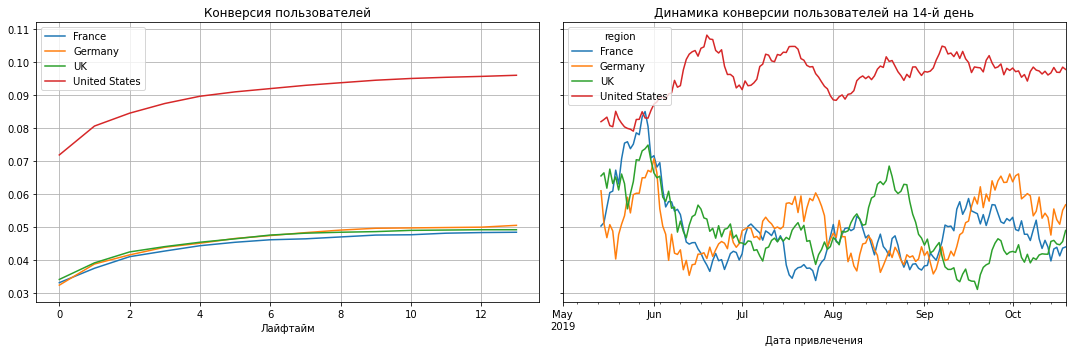

In [39]:
# получение данных по конверсиям в разрезе стран
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    cac_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# визуализация конверсий в разрезе стран
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Пользователи из США конвертируются в платных гораздо лучше европейских пользователей. Смотрим на удержание

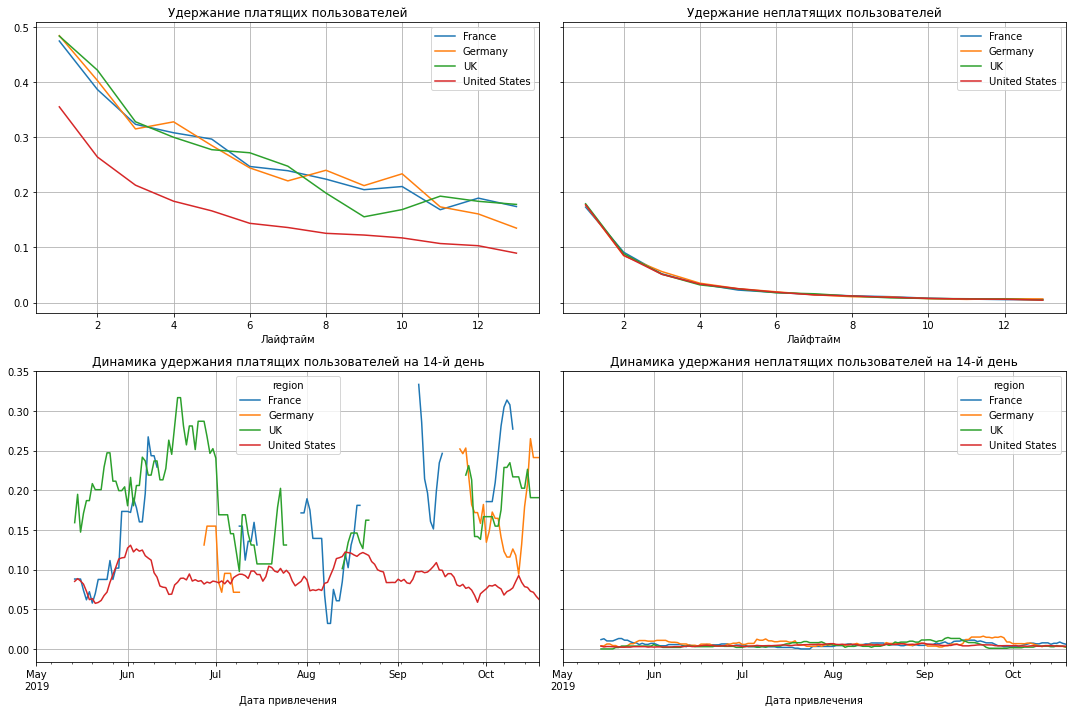

In [40]:
# получение данных по удержанию в разрезе стран
retention_raw, retention_grouped, retention_history = get_retention(
    cac_profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

# визуализаця удержания в разрезе стран
plot_retention(retention_grouped, retention_history, horizon_days) 

Вот и первый звонок. Платящие пользователи из США лучше всего конвертируются (покупают платный функционал), но хуже всего "удерживаются", причем изначально. *Запомним этот момент*

По неплатящим пользователям - ситуация в Европе и США одинаковая, не обращаем внимание

### Изучение конверсии и удержания в разрезе каналов привлечения

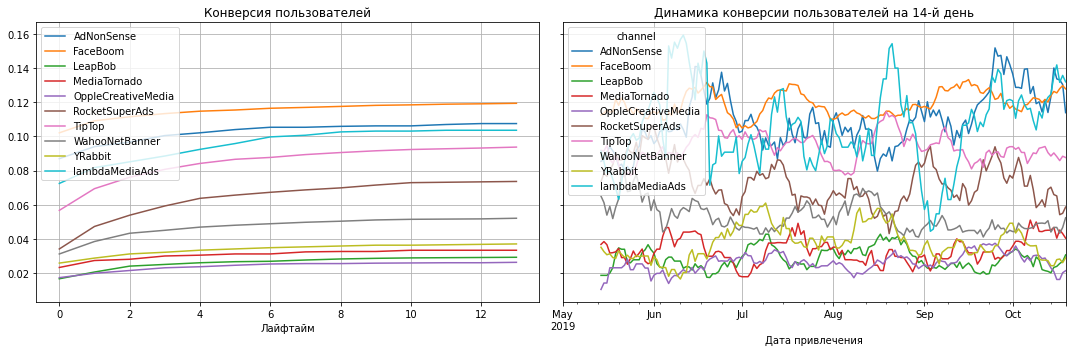

In [41]:
# получение данных по конверсиям в разрезе каналов привлечения
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    cac_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# визуализация конверсий в разрезе каналов привлечения
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

В целом, тренд конверсии у всех каналов одинаковый (судя по лайфтайму). Разница в конверсии связана с уровнем популярности какой-либо платформы/соц. сети. Например, условный Facebook является лидером, что логично - это самая популярная соц.сеть в мире и особенно в США

Посмотрим на удержание

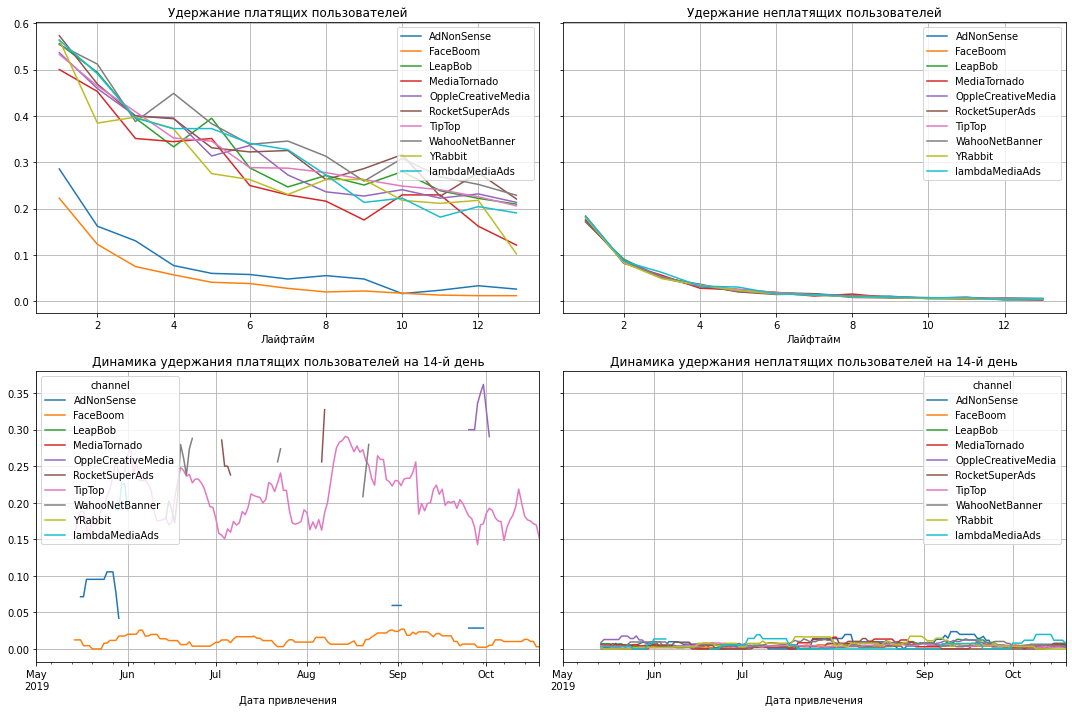

In [42]:
# получение данных по удержанию в разрезе каналов привлечения
retention_raw, retention_grouped, retention_history = get_retention(
    cac_profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

# визуализаця удержания в разрезе каналов привлечения
plot_retention(retention_grouped, retention_history, horizon_days) 

*Оффтоп:* интересное наблюдение. Изначально предполагал, что в основном проблемы связаны с TipTop, но очень низкое удержание наблюдается у FaceBoom и AdNonSense (ранее были опознаны как в целом неэффективные). У TipTop удержание в порядке, динамика удержания в целом стабильна, какого-либо тренда на уменьшение/рост платящих пользователей не наблюдается.

Канал FaceBoom в принципе не привлекает платных пользователей, что очень странно. Походу подтверждается гипотеза о некорректной гиперссылке или технической проблеме при переходе на лендинг. *Если адаптировать к реальности, с огромной вероятностью реклама была в Instagram - а она довольно часто перекидывает на отдельный сайт*.

Замечаем, что по 8 источникам из 10 данные по динамике практически отсутствуют, динамика за весь период наблюдается только у TipTop и FaceBoom. Подветрждается гипотеза, что маркетологи изначально сосредоточились только на этих 2-х каналах (80% всего рекламного бюджета). Остальные каналы использовали периодически. *Или это может быть сделано вообще специально - лень создать нормальный аккаунт в Инсте и перекидывать на него. Или Бизнес настоял очень быстро продвинуть приложение, но для условного Facebook не успели нанять SMM-щика. Ставка не сыграла*


**Вывод по удержанию в каналах привлечения:** в приоритете изначально было 2 канала привлечения, у одного из них практически отсутствует удержание (у FaceBoom).

# Итоговые выводы

Судя по общей картине по бизнес-показателям, в ходе рекламной кампании была выявлена неэффективность рекламы у следующих категорий пользователей:
- Используют смартфоны и компьютеры Mac
- Проживают в США
- Привлечены через каналы TipTop, FaceBoom и AdNotSense

Проблемы были выявлены, прежде всего, у платящих пользователей, что существенно повлияло на выручку и реклама оказалась убыточной.

Рекомендации маркетологам:
- 1) **Не отдавать предпочтений каким-либо каналам изначально** (как произошло с TipTop и FaceBoom - 80% бюджета). 

Приложение, судя по названию Procrastinate Pro+, позволяло либо "убивать время", либо, наоборот, бороться с прокрастинацией. В первом случае, не стоило вообще рассматривать TipTop как место рекламы - в реальном мире это была бы реклама у прямого и очень сильного конкурента (большинство обычных пользователей используют TikTok сугубо в развлекательных целях). Во втором случае - реклама тут очень даже могла зайти. Скорее всего, сработал именно первый случай, и вкупе с юридическими рисками канал в США не окупился.

Второй по объему бюджета канал - FaceBoom. Он оказался самым неэффективным по удержанию со старта кампании, при этом на него было потрачено 30% бюджета. Дешевле выйдет нанять толкового SMM и создать продающий аккаунт в Instagram (возможно, такой шаг с самого начала позволил бы избежать убытков).

- 2) **Вовремя реагировать на аномалии в показателях**

Резкий рост CAC был зафиксирован только у TipTop, что отрицательно сказалось на окупаемости всей рекламной кампании. Если первый месяц сочли бы за погрешность, а на 2-ой уже среагировали (скачки были схожими) и пересмотрели бюджет в пользу более эффективных каналов (например, YRabbit или LambdaMediaAds) - был бы шанс избежать неокупаемости.

- 3) **Не делать акцент на одной стране**

Исходя из таблицы профилей, 2/3 всех новых пользователей было привлечено в США. Стоило рассмотреть и другие регионы мира - например, Азию (в том же TipTop заложить бюджет на этот регион, так как приложение очень популярно в Китае). Также, судя по графикам в разрезе стран и каналов, те же YRabbit, LambdaMediaAds или MediaTornado оказались эффективными в Европе.

- 4) **Вовремя перераспределять траффик рекламы между устройствами**

На устройствах Apple зафиксирован более ощутимый скачок CAC и, скорее всего, это произошло в США - что логично, так как сама компания американская и имеет большую базу пользователей именно в этой стране. В тех же США стоило перераспределить траффик на более дешевые по стоимости привлечения и более стабильные платформы (PC)